https://github.com/theo-lq/Xi-Correlation/tree/main

In [2]:
import pandas as pd
import numpy as np
import os
import neurokit2 as nk
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import statsmodels.api as sm
import gc
%matplotlib inline

In [40]:
import numpy as np
from scipy.stats import rankdata, norm




def xi_correlation(x, y, continuous=False):
    """Compute the correlation coefficient between x and y according to the xi coefficient defined by Chatterjee.

    Usage::
        >>> size = 250
        >>> x = np.linspace(start=-5, stop=5, num=size)
        >>> y = x / 2 + np.sin(x) + 0.2 * np.random.normal(size)
        >>> xi_correlation(

    :param x: A list.
    :param y: A list.
    :rtype: A tuple of real.
    """
    
    
    
    def rank_order(vector):
        random_index = np.random.choice(np.arange(length), length, replace=False)
        randomized_vector = vector[random_index]
        ranked_vector = rankdata(randomized_vector, method="ordinal")
        answer = [ranked_vector[j] for _, j in sorted(zip(random_index, range(length)))]
        return answer
    
    
    
    
    def compute_d_sequence(y):
        l = rankdata([-i for i in y], method="max")
        return np.sum(l * (length - l)) / (length ** 3)
    
    
    
    
    def compute_xi_coefficient(vector):
        mean_absolute = np.sum(np.abs([a - b for a, b in zip(vector[:- 1], vector[1:])]))
        return 1 - mean_absolute / (2 * (length**2) * d_sequence)
    
    
    
    
    def compute_p_value(continuous=continuous):
        
        if continuous:
            sigma = 2 / 5
        
        else:
            sorted_x_ordered = sorted(x_ordered_max_rank)
            
            index = [i for i in range(1, length+1)]
            doubled_index = [2 * length - 2 * i + 1 for i in index]
            cumulative_sum = np.cumsum(sorted_x_ordered)
            
            a = np.sum([i * (u**2) for i, u in zip(doubled_index, sorted_x_ordered)]) / (length ** 4)
            b = np.sum([v + (length - i) * u for i, u, v in zip(index, sorted_x_ordered, cumulative_sum)]) / (length ** 5)
            c = np.sum([i * u for i, u in zip(doubled_index, sorted_x_ordered)]) / (length ** 3)
            
            tau_squared = (a - 2 * b + np.square(c)) / (np.square(d_sequence))
            
            sigma = np.sqrt(tau_squared)
        
        
        
        p_value = 1 - norm.cdf(np.sqrt(length) * correlation / np.sqrt(sigma))
        
        return p_value
    

    
    x, y = np.array(x), np.array(y)
    length = len(x)
    
    x_ordered = np.argsort(rank_order(x))
    y_rank_max = rankdata(y, method="max")
    x_ordered_max_rank = y_rank_max[x_ordered]
    d_sequence = compute_d_sequence(y)
    
    correlation = compute_xi_coefficient(x_ordered_max_rank)
    p_value = compute_p_value(continuous=continuous)
    
    return correlation, p_value






import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





def correlation_matrix(dataframe, correlation_function, **kwargs):
    """Compute the correlation coefficient for each variable in the dataframe according to the correlation function choosed.

    Usage::
        >>> from Xi_correlation import xi_correlation
        >>> size = 250
        >>> x = np.linspace(start=-5, stop=5, num=size)
        >>> y = x / 2 + np.sin(x) + 0.2 * np.random.normal(size=size)
        >>> z = (x ** 2) / 5 + 0.2 * np.random.normal(size=size)
        >>> X = pd.DataFrame({'x': x, 'y': y, 'z': z})
        >>> matrix = correlation_matrix(X, xi_correlation)

    :param dataframe: A pandas DataFrame.
    :param correlation_function: A function, returning tuple (coefficient, pvalue).
    :rtype: A pandas DataFrame.
    """
    
    
    n_columns = dataframe.shape[1]
    matrix = np.zeros((n_columns, n_columns))
    
    
    x_index = 0
    for x_column in dataframe.columns:
        
        y_index = 0
        for y_column in dataframe.columns:
            correlation, _ = correlation_function(dataframe[x_column], dataframe[y_column], **kwargs)
            matrix[y_index, x_index] = correlation
            
            y_index += 1
        
        x_index += 1
    
    matrix = pd.DataFrame(matrix, columns=dataframe.columns, index=dataframe.columns)
    return matrix







def show_correlation_matrix(dataframe, correlation_function, **kwargs):
    """Show the correlation matrix for a given dataframe according to the correlation function given.

    Usage::
        >>> from Xi_correlation import xi_correlation
        >>> size = 250
        >>> x = np.linspace(start=-5, stop=5, num=size)
        >>> y = x / 2 + np.sin(x) + 0.2 * np.random.normal(size=size)
        >>> z = (x ** 2) / 5 + 0.2 * np.random.normal(size=size)
        >>> X = pd.DataFrame({'x': x, 'y': y, 'z': z})
        >>> show_correlation_matrix(X, xi_correlation)

    :param dataframe: A pandas DataFrame.
    :param correlation_function: A function, returning tuple (coefficient, pvalue).
    :rtype: A matplotlib type plot
    """
    
    
    matrix = correlation_matrix(dataframe, correlation_function, **kwargs)
    sns.heatmap(matrix, annot=True, fmt='f', linewidths=0.5, cmap='Reds')
    plt.show()


(np.float64(0.8094512378049512), np.float64(0.0))


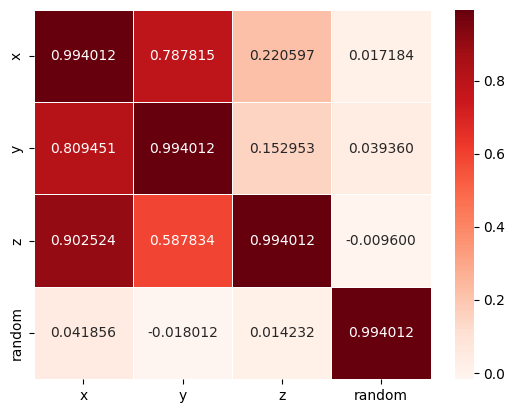

In [41]:
import numpy as np
import pandas as pd




size = 500
x = np.linspace(start=-15, stop=15, num=size)
y = x / 2 + np.sin(x) + 0.8 * np.random.normal(size=size)
z = (x ** 2) / 5 + 0.8 * np.random.normal(size=size)
random = np.random.normal(size=size)
df = pd.DataFrame({'x': x, 'y': y, 'z': z, 'random': random})



print(xi_correlation(x, y))
show_correlation_matrix(df, xi_correlation)

In [3]:
folder_path = "/Users/annapalatkina/Desktop/drive/participants"  

data_full = pd.DataFrame(columns=['Row', 'Timestamp', 'EDA', 'ECG', 'EventLabel', 'Participant'])


for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)  
    if filename.endswith('.csv'): 
        data = pd.read_csv(file_path, comment='#',low_memory=False)
        if 'Channel 9 (EDA100C)' in data.columns:
            eda_column = 'Channel 9 (EDA100C)'
            ecg_column = 'Channel 13 (ECG100C)'
        elif 'Channel 9 (Raw)' in data.columns:
            eda_column = 'Channel 9 (Raw)'
            ecg_column = 'Channel 13 (Raw)'
        data = data[['Row', 'Timestamp', eda_column, ecg_column,'MarkerName','MarkerType']]
        start, end = data.query('MarkerName == "Experiment" and MarkerType == "S"').index.values[0], data.query('MarkerName == "Experiment" and MarkerType == "E"').index.values[0]
        data = data[start:end+1]
        data.reset_index(inplace=True, drop=True)
        markers =  list(data[data['MarkerName'].notna()].sort_values('Row').MarkerName.unique())
        markers.remove('Experiment')
        data['EventLabel'] = pd.Series(dtype='object')
        for i,m in enumerate(markers):
            start = data[(data.MarkerName == m) & (data.MarkerType == "S")].index.values[0]
            end = data[(data.MarkerName == m) & (data.MarkerType == "E")].index.values[0]
            data.loc[start:end, 'EventLabel'] = data.loc[start:end, 'EventLabel'].fillna(m)
        data['EventLabel'] = data['EventLabel'].fillna('Silence')
        data.dropna(subset=[eda_column, ecg_column], inplace=True)
        data.drop(columns=['MarkerName', 'MarkerType'], inplace=True)
        data['Participant'] = [filename.split('.')[0]] * len(data)
        data.rename(columns={eda_column: 'EDA', ecg_column:'ECG'}, inplace=True)
        data_full = pd.concat([data_full, data], ignore_index=True)
        del data
        gc.collect()
 
  
data_full

/var/folders/f1/w7d0x47j0qq9jn7k7vhjrkzh0000gn/T/ipykernel_83827/2183265743.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_full = pd.concat([data_full, data], ignore_index=True)


,Row,Timestamp,EDA,ECG,EventLabel,Participant
0,4507,10545.0005,1.191406,0.973206,Silence,I8L4N6G7
1,4508,10550.0005,1.192017,1.372375,Silence,I8L4N6G7
2,4509,10555.0005,1.191711,1.466064,Silence,I8L4N6G7
3,4514,10560.0005,1.192322,1.022949,Silence,I8L4N6G7
4,4515,10565.0005,1.192322,0.177612,Silence,I8L4N6G7
...,...,...,...,...,...,...
3050935,397469,933564.2909,1.839600,-0.037537,Silence,K4G7Y9O2
3050936,397471,933569.2909,1.841431,-0.045776,Silence,K4G7Y9O2
3050937,397472,933574.2909,1.839905,-0.041504,Silence,K4G7Y9O2
3050938,397473,933579.2909,1.840210,-0.043945,Silence,K4G7Y9O2


In [4]:
sampling_rate = 200

In [8]:
mask_silence = (data_full["EventLabel"] == "Silence")
mask_negative = (data_full["EventLabel"] == "IntenseAudio")
mask_positive = (data_full["EventLabel"] == "CalmAudio")
mask_music = (data_full["EventLabel"] == "InterimAudio")

positives = data_full[mask_positive]
negatives = data_full[mask_negative]
baselines = data_full[mask_silence]

In [9]:
positives

,Row,Timestamp,EDA,ECG,EventLabel,Participant
40076,89834,210925.0005,1.007996,-0.139771,CalmAudio,I8L4N6G7
40077,89841,210930.0005,1.008606,-0.095520,CalmAudio,I8L4N6G7
40078,89843,210935.0005,1.007996,-0.091248,CalmAudio,I8L4N6G7
40079,89844,210940.0005,1.008911,-0.144348,CalmAudio,I8L4N6G7
40080,89846,210945.0005,1.008606,-0.163269,CalmAudio,I8L4N6G7
...,...,...,...,...,...,...
3031775,357516,837764.2909,1.879883,0.332031,CalmAudio,K4G7Y9O2
3031776,357519,837769.2909,1.879883,0.311584,CalmAudio,K4G7Y9O2
3031777,357520,837774.2909,1.879883,0.285034,CalmAudio,K4G7Y9O2
3031778,357522,837779.2909,1.879272,0.263062,CalmAudio,K4G7Y9O2


In [ ]:
def get_rmssd_df_time_(ecg_data_raw, segment_duration, participant_id):
    
    ecg = nk.ecg_clean(ecg_data_raw, sampling_rate=sampling_rate)
    peaks, info = nk.ecg_peaks(ecg, sampling_rate=sampling_rate)
    r_peaks = info['ECG_R_Peaks']
    #segment_duration = 60  # For 1-minute segments (use 30 for 30-second segments)

    # Step 1: Convert R-peak indices to time (seconds)
    times = np.array(r_peaks) / sampling_rate

    # Step 2: Calculate RR intervals (in milliseconds)
    rr_intervals = np.diff(times) * 1000  # Difference in seconds, then convert to ms

    # Step 3: Segment the data
    total_duration = times[-1]  # Total experiment time in seconds
    num_segments = int(np.floor(total_duration / segment_duration))
    # print(total_duration, num_segments)

    rmssd_per_segment = []
    time_list = []

    for seg in range(num_segments):
        # Define the time window for this segment
        start_time = seg * segment_duration
        end_time = (seg + 1) * segment_duration
        
        # Find R-peaks within this time window
        mask = (times[:-1] >= start_time) & (times[:-1] < end_time)
        segment_rr = rr_intervals[mask]
        
        # Step 4: Calculate RMSSD for this segment
        successive_diffs = np.diff(segment_rr)
        squared_diffs = successive_diffs ** 2
        mean_squared_diffs = np.mean(squared_diffs)
        rmssd = np.sqrt(mean_squared_diffs)
        rmssd_per_segment.append(rmssd)
        time_list.append(end_time)
    
    # print(len(time_list), len(rmssd_per_segment))
    rmssd_df = pd.DataFrame({'Time': time_list, 'RMSSD': rmssd_per_segment, 'Participant': participant_id})
    rmssd_df['Time_str'] = rmssd_df['Time'].apply(lambda x: str(timedelta(seconds=x)))

    return rmssd_df

In [11]:
segment_duration = 30


positives_dfs= [get_rmssd_df_time_(data.ECG, segment_duration, participant_id) for participant_id, data in positives.groupby(by='Participant')]
positives_df = pd.concat(positives_dfs, ignore_index=True)

negatives_dfs = [get_rmssd_df_time_(data.ECG, segment_duration, participant_id) for participant_id, data in negatives.groupby(by='Participant')]
negatives_df = pd.concat(negatives_dfs, ignore_index=True)

baselines_dfs = [get_rmssd_df_time_(data.ECG, segment_duration, participant_id) for participant_id, data in baselines.groupby(by='Participant')]
baselines_df = pd.concat(baselines_dfs, ignore_index=True)


In [12]:
positives_df

,Time,RMSSD,Participant,Time_str
0,30,20.473560,C1K4L9S8,0:00:30
1,60,30.166206,C1K4L9S8,0:01:00
2,90,26.790706,C1K4L9S8,0:01:30
3,120,21.294325,C1K4L9S8,0:02:00
4,150,35.057556,C1K4L9S8,0:02:30
...,...,...,...,...
148,150,24.341323,Z6A2W1E8,0:02:30
149,180,26.542177,Z6A2W1E8,0:03:00
150,210,28.856408,Z6A2W1E8,0:03:30
151,240,25.482837,Z6A2W1E8,0:04:00


In [ ]:
xi_correlation(positives_df['RMSSD'], positives_df['Time'])
# correlation, p_value

(np.float64(0.002941176470588225), np.float64(0.49240295330387795))

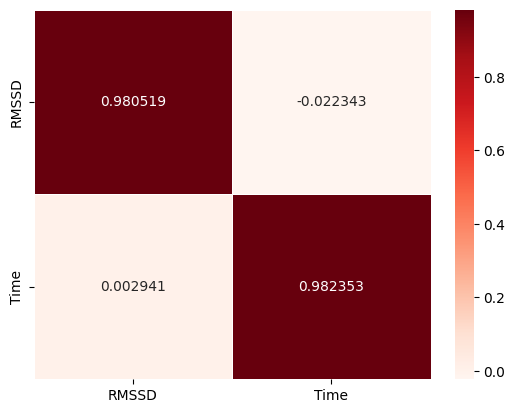

In [42]:
show_correlation_matrix(positives_df[['RMSSD', 'Time']], xi_correlation)

In [34]:
from scipy import stats
stats.pearsonr(positives_df['RMSSD'], positives_df['Time'])

PearsonRResult(statistic=np.float64(0.0682650676525425), pvalue=np.float64(0.4017801464542956))